# Exercise 1
I denne øvelse skal I eksperimentere med Principal Component Analysis (PCA) til dimensionsreduktion og visualisering. I skal arbejde med datasættet ”Handwritten digits” fra Scikit Learn, som er scannede billeder af håndskrevne tal imellem 0 og 9 (dvs. 10 kategorier).

## Task 1
Indlæs data og lav kort data-analyse, fx. plot nogle eksempel billeder

In [2]:
# Defining methods and importing modules
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.cluster import KMeans


In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
nDigits = len(np.unique(y))

labels = y

data = scale(X)
nSamples, nFeatures = data.shape

print("n_digits: %d \t n_samples %d \t n_features %d"
      % (nDigits, nSamples, nFeatures))

sampleSize = 300

n_digits: 10 	 n_samples 1797 	 n_features 64


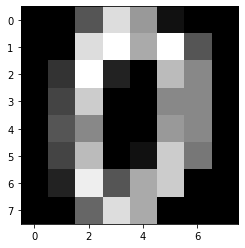

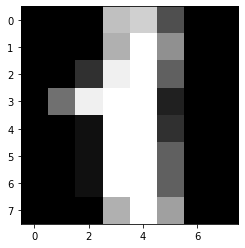

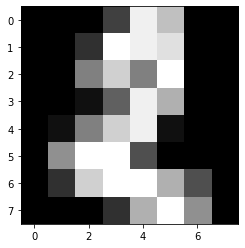

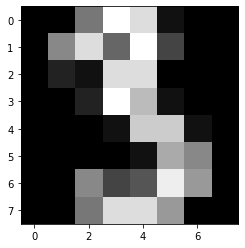

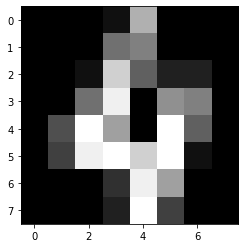

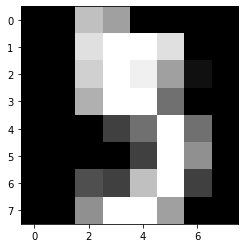

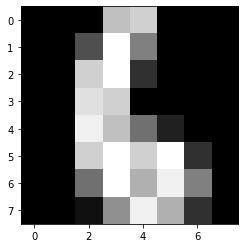

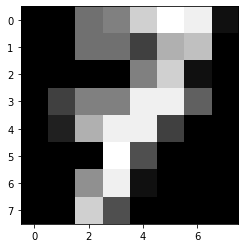

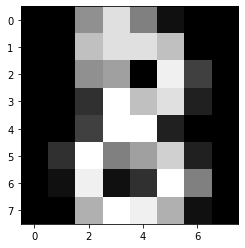

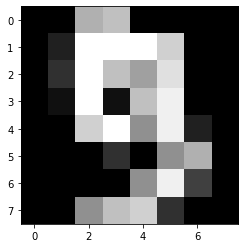

In [5]:
# Plot the digits:
plt.figure(0)
plt.imshow(np.array(X[0]).reshape(8,8), cmap='gray')
plt.figure(1)
plt.imshow(np.array(X[1]).reshape(8,8), cmap='gray')
plt.figure(2)
plt.imshow(np.array(X[2]).reshape(8,8), cmap='gray')
plt.figure(3)
plt.imshow(np.array(X[3]).reshape(8,8), cmap='gray')
plt.figure(4)
plt.imshow(np.array(X[4]).reshape(8,8), cmap='gray')
plt.figure(5)
plt.imshow(np.array(X[5]).reshape(8,8), cmap='gray')
plt.figure(6)
plt.imshow(np.array(X[6]).reshape(8,8), cmap='gray')
plt.figure(7)
plt.imshow(np.array(X[7]).reshape(8,8), cmap='gray')
plt.figure(8)
plt.imshow(np.array(X[8]).reshape(8,8), cmap='gray')
plt.figure(9)
plt.imshow(np.array(X[9]).reshape(8,8), cmap='gray')

## Task 2
Plot de forskellige tal/digits i 2D efter PCA dimensionsreduktion.

In [6]:

pca = PCA(n_components=2)
data2Dim = pca.fit(data.T)

# principale akser
data2DimComponents = pca.components_

# varianser og standard afvigelser (længde af akser)
varians = pca.explained_variance_
standardDeviation = np.sqrt(varians)

# Udtrukket middelværdi
mean = pca.mean_

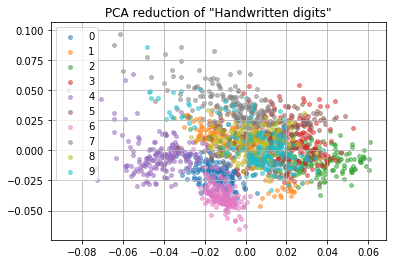

In [7]:
fig, plot = plt.subplots()
for number in range(10):
    numArr = np.where(labels == number)
    x = data2DimComponents[0,numArr[0]]
    y = data2DimComponents[1,numArr[0]]
    plot.scatter(x, y, s=15, label=number,
               alpha=0.5)

plot.legend()
plot.set_title('PCA reduction of "Handwritten digits"')
plot.grid(True)

plt.show()

# Exercise 2
I denne øvelse skal I benytte PCA til kompression/dekompression af data. I skal først benytte eksemplet nedenfor til at komprimere (transformere) data ned til en lavere dimension og dernæst rekonstruere billedet igen.

## Task 1
Plot varianserne (explained_variance_ i PCA objekt – med n_components til max.) – relater til valg af komponenter.

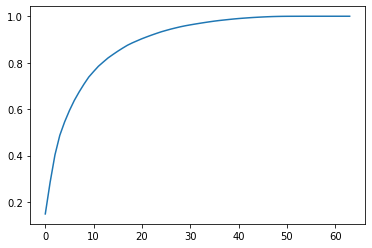

In [83]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(0)
plt.plot(range(len(data[0])),cumsum)

## Task 2
Rekonstruér nogle tal og sammenlign med de originale – ligner de ?

Samples: 8
Features: 64


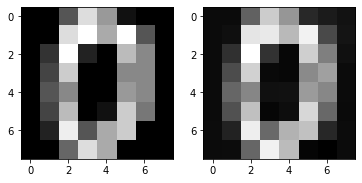

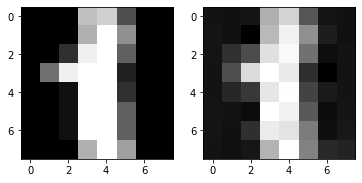

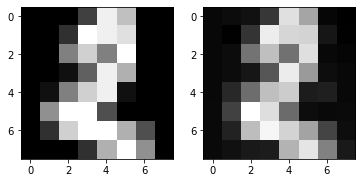

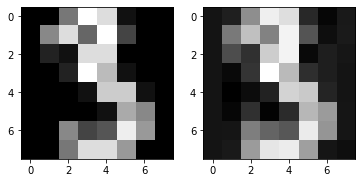

In [85]:
n_samples, h = X.shape
pca = PCA(n_components=30)
data30Dim = pca.fit_transform(X)
recovered_data = pca.inverse_transform(data30Dim);

#test =  pca.components_.reshape(8,8)

nSamples, nFeatures = data8Dim.components_.shape
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.array(X[0]).reshape(8,8), cmap='gray')
ax[1].imshow(np.array(recovered_data[0]).reshape(8,8), cmap='gray')
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.array(X[1]).reshape(8,8), cmap='gray')
ax[1].imshow(np.array(recovered_data[1]).reshape(8,8), cmap='gray')
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.array(X[2]).reshape(8,8), cmap='gray')
ax[1].imshow(np.array(recovered_data[2]).reshape(8,8), cmap='gray')
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.array(X[3]).reshape(8,8), cmap='gray')
ax[1].imshow(np.array(recovered_data[3]).reshape(8,8), cmap='gray')

print("Samples: " + str(nSamples))
print("Features: " + str(nFeatures))


## Task 3
Hvor meget data fylder jeres billeder før og efter kompressionen ?

In [14]:
print("Size of original data: " + str(len(bytearray(data))));
print("Size if compressed data: " + str(len(bytearray(data30Dim))));

Size of original data: 920064
Size if compressed data: 431280


## Task 4
Plot også middelværdi-billedet (dvs. rekonstruér udfra middelværdien).

[-1.34912891 -4.98154126 -1.00186585 -0.51454653 -0.3152203   0.2561742
  0.34228281 -0.31242984 -0.46196935 -0.29047678  0.20678414  0.78614834
  0.3188048   0.89769354  0.04903677  0.12459058  0.28319858  0.24625177
  0.04128216 -0.64807053 -0.59096469  0.17167442 -0.29894053 -0.94649946
 -0.27107965 -0.09672008  0.10443734  0.18721897  0.21801222  0.22935621]


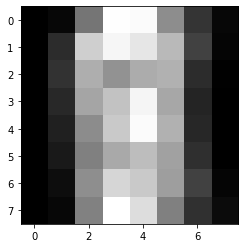

In [70]:
threes = np.array([data30Dim[3]]);

for n in np.arange(13,1013,10):
    threes = np.append(threes,[data30Dim[n]], axis=0)

meanThrees = np.mean(threes, axis=0)

recovered_data = pca.inverse_transform(meanThrees);
print(meanThrees)

plt.figure(0)
plt.imshow(recovered_data.reshape(8,8), cmap='gray')
